#Introduction
Dataset: Kidney Disease Dataset
Goal: Predict whether a patient has Chronic Kidney Disease (CKD) or not

Fill in the "# YOUR CODE HERE" sections using what you learned and use the hints!!

HINT: Look at the protein classification notebook for reference!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 26)

# Machine Learning imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, precision_score,
                             recall_score, f1_score)

In [ ]:
df = pd.read_csv('kidney_disease.csv')
# read in the csv (comma seperated value) file
print("\n" + "="*60)
print("📊 DATASET OVERVIEW")
print("="*60)
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
# df.shape shows you how many rows and columns there are
print(df.head())
# df.head shows you the first few rows of the dataset!


📊 DATASET OVERVIEW
Shape: 400 rows × 26 columns
   id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr    bu   sc    sod  pot  hemo pcv    wc   rc  htn   dm cad appet   pe  \
0  121.0  36.0  1.2    NaN  NaN  15.4  44  7800  5.2  yes  yes  no  good   no   
1    NaN  18.0  0.8    NaN  NaN  11.3  38  6000  NaN   no   no  no  good   no   
2  423.0  53.0  1.8    NaN  NaN   9.6  31  7500  NaN   no  yes  no  poor   no   
3  117.0  56.0  3.8  111.0  2.5  11.2  32  6700  3.9  yes   no  no  poor  yes   
4  106.0  26.0  1.4    NaN  NaN  11.6  35  7300  4.6   no   no  n

INSPECT the dataset. What do you think the target column should be?? (What are we predicting??)

Hint: Dataset Goal: Predict whether a patient has Chronic Kidney Disease (CKD) or not

In [ ]:
# just making the columns more user friendly (not short version)
df.columns = ['id','age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'classification']
print("\n✓ Renamed columns to be more readable")



✓ Renamed columns to be more readable


In [ ]:
print("🎯 TARGET VARIABLE: classification")
print("="*60)
# YOUR CODE HERE: Print the value counts of the 'classification' column
# HINT: Use .value_counts() method
# Hint 2: print(df['-----column name-----'].<method>
print(df['classification'].value_counts())

🎯 TARGET VARIABLE: classification
classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64


Notice here that we have more than two types of values. The '\t'  

In [ ]:
# replace incorrect values
df['classification'] = df['classification'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

#YOUR CODE HERE, do the same as the last code block (value_counts())
print(df['classification'].value_counts())

classification
ckd        250
not ckd    150
Name: count, dtype: int64


In [ ]:
print("\n Missing Values: \n")
# YOUR CODE HERE: Print the sum of missing values for each column
# HINT: Use .isnull().sum()
# Hint 2: you should be calling the dataframe



 Missing Values: 

id                           0
age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
classification               0
dtype: int64


## Data Preprocessing

In [ ]:
print("🧹 DATA PREPROCESSING")
print("="*60)

# we need to drop columns that are irrelevant for our
# model (recall what types of columns we look to drop)
# HINT - should we train our model on id like our student id??
df = df.drop(--insert col here---, axis=1)
print("✓ Dropped 'id' column")

# Step 3.1: Handle missing values for NUMERIC columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        # YOUR CODE HERE: Fill missing values with the median
        # HINT: df[col].fillna(df[col].median(), inplace=True)

        print(f"✓ Filled {col} with median")

🧹 DATA PREPROCESSING
✓ Dropped 'id' column
✓ Filled age with median
✓ Filled blood_pressure with median
✓ Filled specific_gravity with median
✓ Filled albumin with median
✓ Filled sugar with median
✓ Filled blood_glucose_random with median
✓ Filled blood_urea with median
✓ Filled serum_creatinine with median
✓ Filled sodium with median
✓ Filled potassium with median
✓ Filled haemoglobin with median


ignore the warning, but we successfully got rid of the null values by replacing them with median of the column.

In [ ]:
# Step 3.2: Handle missing values for CATEGORICAL columns

#YOUR CODE HERE- define categorical_cols: what data type are categorical columns?
# HINT: Categorical columns are words AKA strings AKA (rhymes with bobject)
categorical_cols = df.select_dtypes(include=['---insert---']).columns
categorical_cols = [col for col in categorical_cols if col != 'classification']  # Don't fill target!

# Handle missing values for CATEGORICAL columns
print("\n📌 Handling missing values in categorical columns...")
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna('unknown', inplace=True)
        print(f"✓ Filled {col} with 'unknown'")



📌 Handling missing values in categorical columns...
✓ Filled red_blood_cells with 'unknown'
✓ Filled pus_cell with 'unknown'
✓ Filled pus_cell_clumps with 'unknown'
✓ Filled bacteria with 'unknown'
✓ Filled packed_cell_volume with 'unknown'
✓ Filled white_blood_cell_count with 'unknown'
✓ Filled red_blood_cell_count with 'unknown'
✓ Filled hypertension with 'unknown'
✓ Filled diabetes_mellitus with 'unknown'
✓ Filled coronary_artery_disease with 'unknown'
✓ Filled appetite with 'unknown'
✓ Filled peda_edema with 'unknown'
✓ Filled aanemia with 'unknown'


In [ ]:
for col in categorical_cols:
    print(f"{col} has {df[col].unique()} values\n")
# looking at unique values in categorical columns

red_blood_cells has ['unknown' 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' 'unknown'] values

pus_cell_clumps has ['notpresent' 'present' 'unknown'] values

bacteria has ['notpresent' 'present' 'unknown'] values

packed_cell_volume has ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' 'unknown' '16' '24'
 '37' '30' '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17'
 '46' '23' '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49'
 '50' '53' '51' '54'] values

white_blood_cell_count has ['7800' '6000' '7500' '6700' '7300' 'unknown' '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4

In [ ]:
# Clean up inconsistent categorical values
print("\n📌 Cleaning categorical values...")
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'}, inplace=True)
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')
print("✓ Fixed categorical inconsistencies")



📌 Cleaning categorical values...
✓ Fixed categorical inconsistencies


In [ ]:
print("\n📌 Encoding target variable...")
# YOUR CODE HERE: Create a LabelEncoder and encode the 'classification' column
# HINT: le = LabelEncoder()
#       df['classification_encoded'] = le.fit_transform(df['classification'])

print(f"✓ Target encoded: {le.classes_}")
print(f"  '{le.classes_[0]}' → 0")
print(f"  '{le.classes_[1]}' → 1")



📌 Encoding target variable...
✓ Target encoded: ['ckd' 'not ckd']
  'ckd' → 0
  'not ckd' → 1


Notice some of the values have '\t' appended - we should combine those with the corresponding class. ex. '\tno' should be 'no'

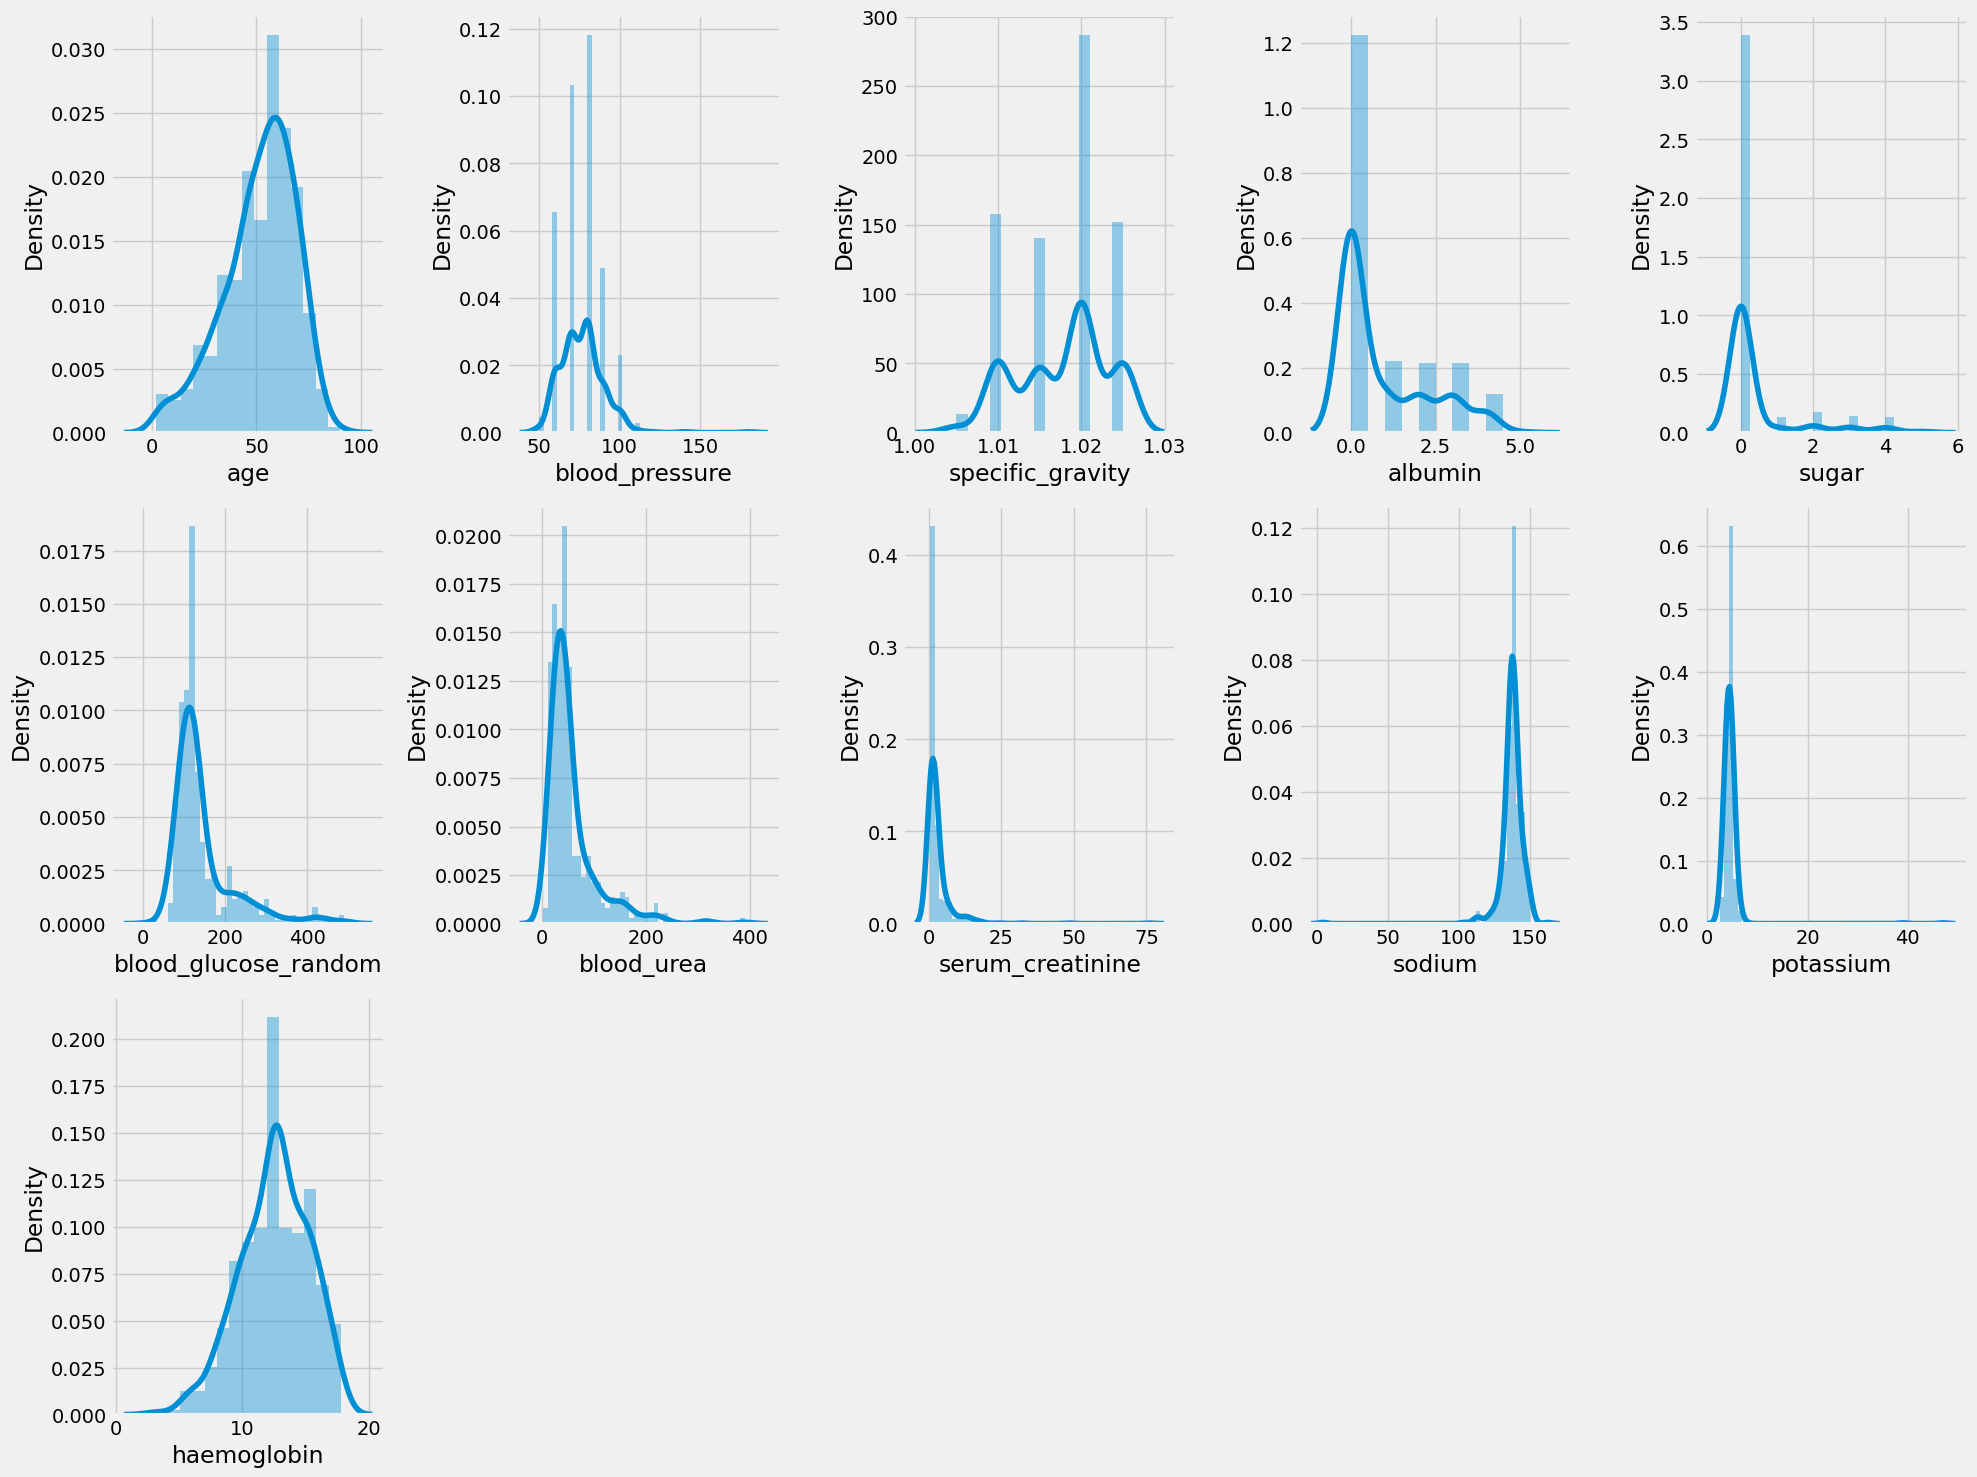

In [ ]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in numeric_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

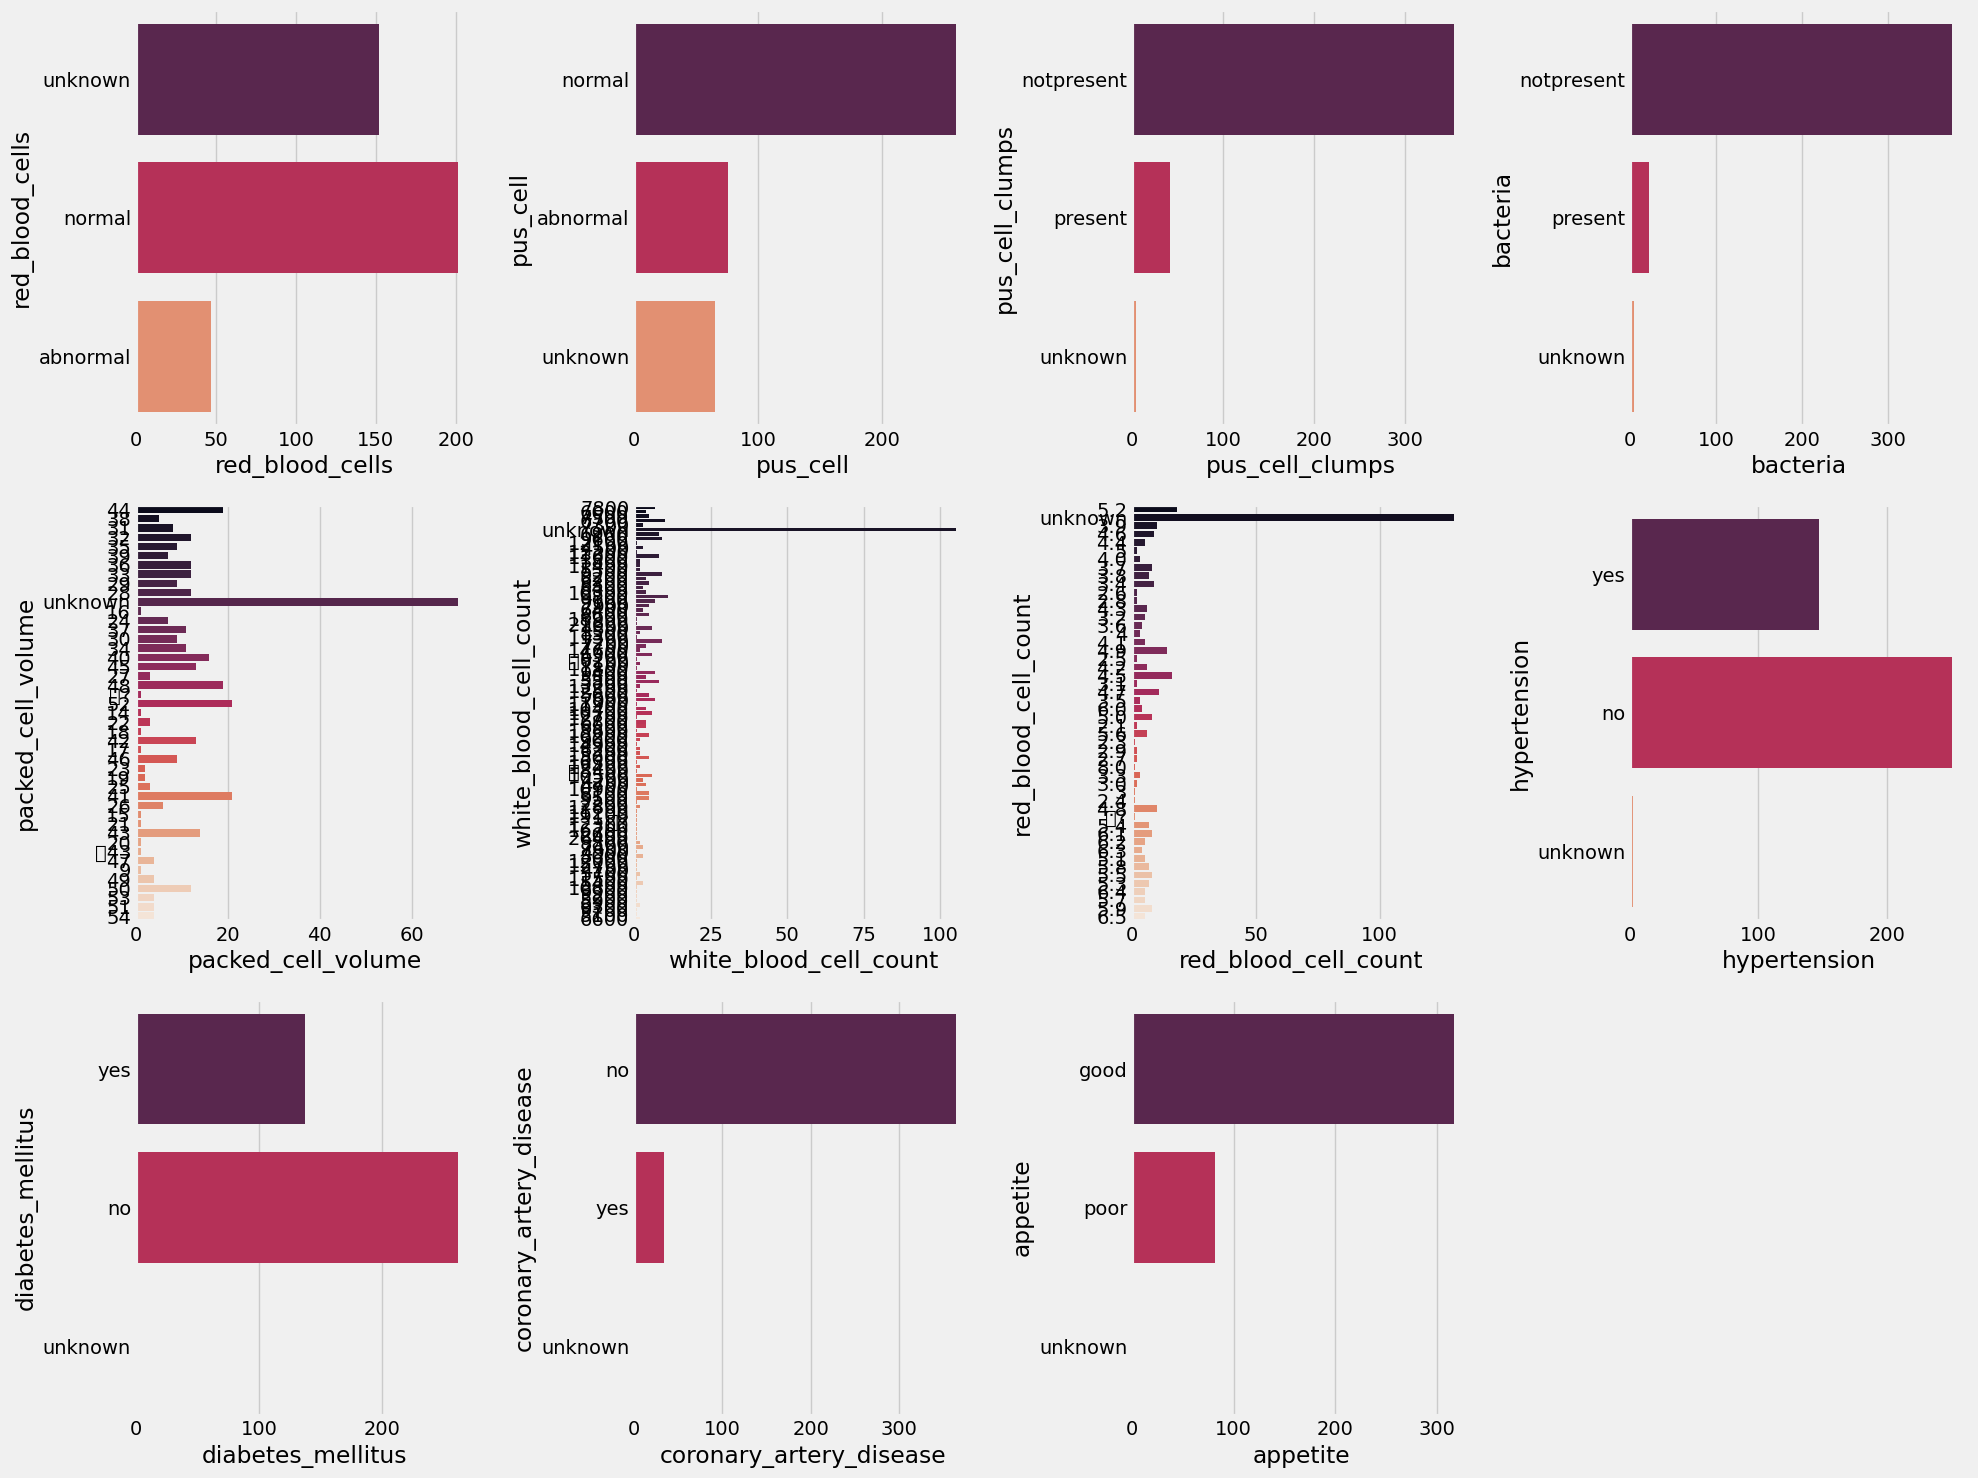

In [ ]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in categorical_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()


🔥 Creating correlation heatmap...
✓ Saved: correlation_heatmap.png


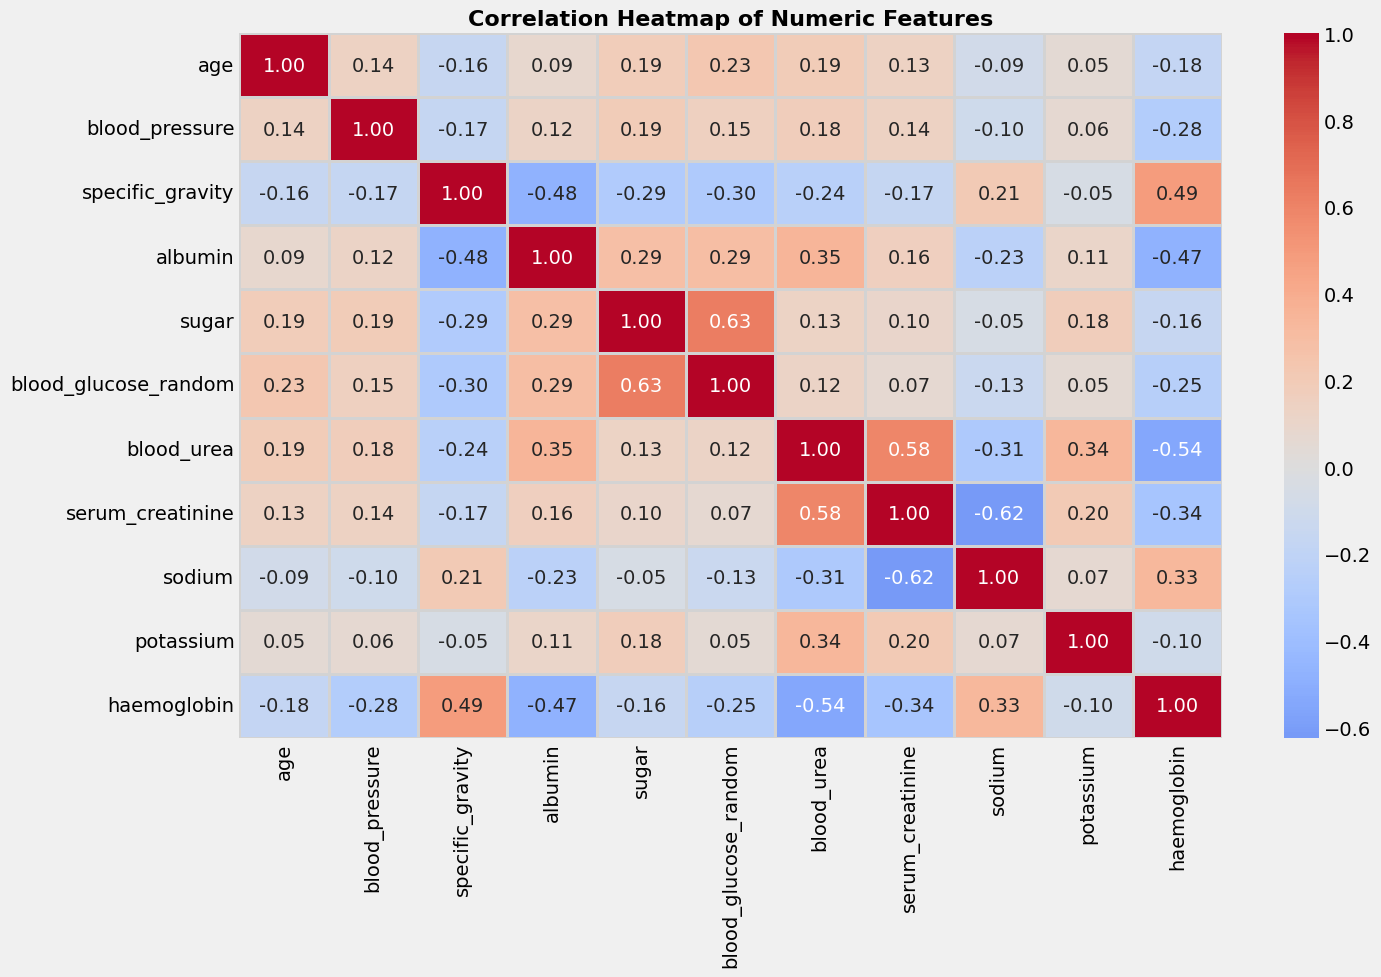

In [ ]:
# heatmap of data

print("\n🔥 Creating correlation heatmap...")
plt.figure(figsize = (15, 10))

# Only include numeric columns (categorical columns can't be correlated!)
numeric_df = df[numeric_cols]
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot = True, fmt='.2f', linewidths = 2,
            linecolor = 'lightgrey', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
print("✓ Saved: correlation_heatmap.png")
plt.show()


#One-Hot Encoding Categorical

In [ ]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'classification', 'classification_encoded'],
      dtype='object')

In [ ]:
print("📌 ONE-HOT ENCODING CATEGORICAL FEATURES")
print("="*60)

# Apply one-hot encoding to categorical columns
# This converts categories like "yes/no" into separate binary columns

# YOUR CODE HERE: what columns should we be one hot encoding??
# df_encoded = pd.get_dummies(df, columns=<WHICH ARRAY>, drop_first=True, dtype=int)

print(f"✓ Before encoding: {df.shape[1]} columns")
print(f"✓ After encoding: {df_encoded.shape[1]} columns")
print(f"✓ Added {df_encoded.shape[1] - df.shape[1]} new binary columns")


📌 ONE-HOT ENCODING CATEGORICAL FEATURES
✓ Before encoding: 26 columns
✓ After encoding: 218 columns
✓ Added 192 new binary columns


In [ ]:
df_encoded.head()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,classification,classification_encoded,...,red_blood_cell_count_unknown,hypertension_unknown,hypertension_yes,diabetes_mellitus_unknown,diabetes_mellitus_yes,coronary_artery_disease_unknown,coronary_artery_disease_yes,appetite_poor,appetite_unknown,peda_edema_unknown,peda_edema_yes,aanemia_unknown,aanemia_yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,ckd,0,...,0,0,1,0,1,0,0,0,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,ckd,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,ckd,0,...,1,0,0,0,1,0,0,1,0,0,0,0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,ckd,0,...,0,0,1,0,0,0,0,1,0,0,1,0,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,ckd,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0


Define Features (X) and Target (y)

In [ ]:
print("🎯 PREPARING X (FEATURES) AND y (TARGET)")
print("="*60)

# Drop the original classification column and keep the encoded one
X = df_encoded.drop(['classification', 'classification_encoded'], axis=1)

# YOUR CODE HERE - what should be the target column??
# Hint: Target col - classification or classification_encoded??
y = df_encoded['------your col here-----']

print(f"✓ X shape: {X.shape}")
print(f"✓ y shape: {y.shape}")
print(f"✓ Number of features: {X.shape[1]}")

print(X.columns)
#these are the columns we are using for trianing (everything except classification col)

🎯 PREPARING X (FEATURES) AND y (TARGET)
✓ X shape: (400, 216)
✓ y shape: (400,)
✓ Number of features: 216
Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium',
       ...
       'diabetes_mellitus_unknown', 'diabetes_mellitus_yes',
       'coronary_artery_disease_unknown', 'coronary_artery_disease_yes',
       'appetite_poor', 'appetite_unknown', 'peda_edema_unknown',
       'peda_edema_yes', 'aanemia_unknown', 'aanemia_yes'],
      dtype='object', length=216)


#Train Test

In [ ]:
print("\n" + "="*60)
print("✂️  TRAIN-TEST SPLIT")
print("="*60)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 80% train, 20% test
    random_state=42,
    stratify=y  # Maintain class distribution
)

print(f"✓ Training set: {X_train.shape[0]} samples")
print(f"✓ Test set: {X_test.shape[0]} samples")
print(f"\nClass distribution in training set:")
print(f"  CKD: {(y_train == 0).sum()}")
print(f"  Not CKD: {(y_train == 1).sum()}")
# here we are printing data on our train test so we can make sure its balanced


✂️  TRAIN-TEST SPLIT
✓ Training set: 320 samples
✓ Test set: 80 samples

Class distribution in training set:
  CKD: 200
  Not CKD: 120


In [ ]:
df_encoded.drop('classification', axis=1) # this was categorical that we dont need

df_encoded.head()
# No categorical (strings/word) !! Thats good guys yayy

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,classification,classification_encoded,...,red_blood_cell_count_unknown,hypertension_unknown,hypertension_yes,diabetes_mellitus_unknown,diabetes_mellitus_yes,coronary_artery_disease_unknown,coronary_artery_disease_yes,appetite_poor,appetite_unknown,peda_edema_unknown,peda_edema_yes,aanemia_unknown,aanemia_yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,ckd,0,...,0,0,1,0,1,0,0,0,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,ckd,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,ckd,0,...,1,0,0,0,1,0,0,1,0,0,0,0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,ckd,0,...,0,0,1,0,0,0,0,1,0,0,1,0,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,ckd,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0


##Feature scaling

In [ ]:
print("📏 FEATURE SCALING")
print("="*60)

# Separate continuous from binary features
features_to_scale = []
binary_features = []

for col in X_train.select_dtypes(include='number').columns:
    unique_vals = X_train[col].dropna().unique()
    # If only 0 and 1, it's binary (don't scale!)
    if len(unique_vals) <= 2 and set(unique_vals).issubset({0, 1, 0.0, 1.0}):
        binary_features.append(col)
    else:
        features_to_scale.append(col)  # Continuous (scale it!)

print(f"✅ Scaling {len(features_to_scale)} continuous features")
print(f"⏭️  Keeping {len(binary_features)} binary features as 0/1")

# Save before
before_scaling = X_train[features_to_scale].head(5).copy()

# Scale only continuous features
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test_scaled[features_to_scale] = scaler.transform(X_test[features_to_scale])

# Save after
after_scaling = X_train_scaled[features_to_scale].head(5).copy()

# YOUR CODE HERE - notice we saved before_scaling and after_scaling
# HINT - use print statements to display the before and after
print("\nBefore: \n", ------ )
print("\nAfter: \n", ----)

print(f"\n✓ Scaled {len(features_to_scale)} features")
print(f"✓ Kept {len(binary_features)} binary as 0/1")


📏 FEATURE SCALING
✅ Scaling 11 continuous features
⏭️  Keeping 205 binary features as 0/1

Before: 
       age  blood_pressure  specific_gravity  albumin  sugar  \
380  59.0            60.0             1.020      0.0    0.0   
56   76.0            70.0             1.015      3.0    4.0   
126  70.0            90.0             1.015      0.0    0.0   
371  28.0            60.0             1.025      0.0    0.0   
333  23.0            80.0             1.020      0.0    0.0   

     blood_glucose_random  blood_urea  serum_creatinine  sodium  potassium  \
380                 113.0        23.0               1.1   139.0        3.5   
56                  121.0       164.0               9.7   131.0        4.4   
126                 144.0       125.0               4.0   136.0        4.6   
371                  79.0        50.0               0.5   145.0        5.0   
333                  99.0        46.0               1.2   142.0        4.0   

     haemoglobin  
380         15.3  
56          1

In [ ]:
# STEP 13: MODEL 1 - LOGISTIC REGRESSION
# ====================================================================

print("\n" + "="*60)
print("🤖 MODEL 1: LOGISTIC REGRESSION")
print("="*60)

# Train Logistic Regression using SGDClassifier
log_model = SGDClassifier(
    loss='log_loss',
    max_iter=1000,
    random_state=42
)

log_model.fit(X_train_scaled, y_train)
log_preds = log_model.predict(X_test_scaled)

# Evaluate
log_accuracy = accuracy_score(y_test, log_preds)
print(f"\n✅ Logistic Regression Accuracy: {log_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, log_preds, target_names=le.classes_))



🤖 MODEL 1: LOGISTIC REGRESSION

✅ Logistic Regression Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        50
     not ckd       1.00      1.00      1.00        30

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80




🌳 MODEL 2: DECISION TREE

✅ Decision Tree Accuracy: 0.9750

Classification Report:
              precision    recall  f1-score   support

         ckd       0.96      1.00      0.98        50
     not ckd       1.00      0.93      0.97        30

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80


✓ Saved: decision_tree_confusion_matrix.png


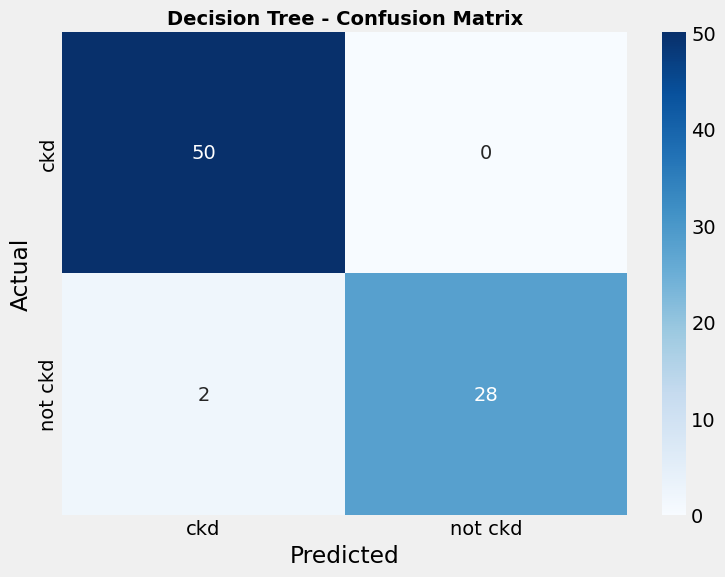

In [ ]:
# STEP 14: MODEL 2 - DECISION TREE
# ====================================================================

print("\n" + "="*60)
print("🌳 MODEL 2: DECISION TREE")
print("="*60)

# Train Decision Tree
tree_model = DecisionTreeClassifier(
    max_depth=10,
    random_state=42
)
# YOUR CODE HERE - fit the model on your own
# HINT: very similar to logistic regression!
# HINT 2: <something>_model.fit(...same as before..)

tree_preds = tree_model.predict(X_test_scaled)

# Evaluate
tree_accuracy = accuracy_score(y_test, tree_preds)
print(f"\n✅ Decision Tree Accuracy: {tree_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, tree_preds, target_names=le.classes_))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, tree_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Decision Tree - Confusion Matrix", fontsize=14, fontweight='bold')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig('decision_tree_confusion_matrix.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: decision_tree_confusion_matrix.png")
plt.show()


# Random Forest


🌲 MODEL 3: RANDOM FOREST

✅ Random Forest Accuracy: 0.9875

Classification Report:
              precision    recall  f1-score   support

         ckd       0.98      1.00      0.99        50
     not ckd       1.00      0.97      0.98        30

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80


📊 Top 10 Most Important Features:
                          feature  importance
10                    haemoglobin    0.154232
2                specific_gravity    0.092415
11         red_blood_cells_normal    0.082380
3                         albumin    0.081046
7                serum_creatinine    0.078198
207         diabetes_mellitus_yes    0.055739
12        red_blood_cells_unknown    0.055215
205              hypertension_yes    0.051644
6                      blood_urea    0.043286
203  red_blood_cell_count_unknown    0.030151

✓ Saved: feature_importance.png


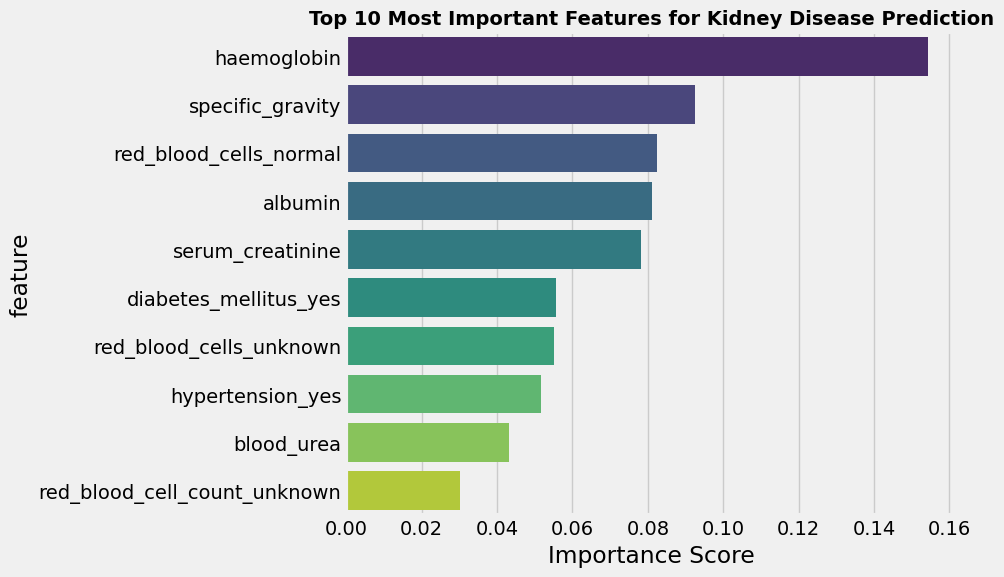

In [ ]:
# STEP 15: MODEL 3 - RANDOM FOREST
# ====================================================================

print("\n" + "="*60)
print("🌲 MODEL 3: RANDOM FOREST")
print("="*60)

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

#YOUR CODE HERE : fit the model and find the predictions as well
# HINT 2: should be similar to the past two just change model name

# YOUR CODE HERE: find the accuracy score
rf_accuracy = ---your code here--

print(f"\n✅ Random Forest Accuracy: {rf_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_preds, target_names=le.classes_))

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n📊 Top 10 Most Important Features:")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
sns.barplot(data=top_features, x='importance', y='feature', palette='viridis')
plt.title("Top 10 Most Important Features for Kidney Disease Prediction",
          fontsize=14, fontweight='bold')
plt.xlabel("Importance Score")
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: feature_importance.png")
plt.show()


📊 MODEL COMPARISON DASHBOARD

              Model  Accuracy  Precision  Recall  F1-Score
Logistic Regression    1.0000   1.000000  1.0000  1.000000
      Decision Tree    0.9750   0.975962  0.9750  0.974814
      Random Forest    0.9875   0.987745  0.9875  0.987456

✓ Saved: model_comparison.png


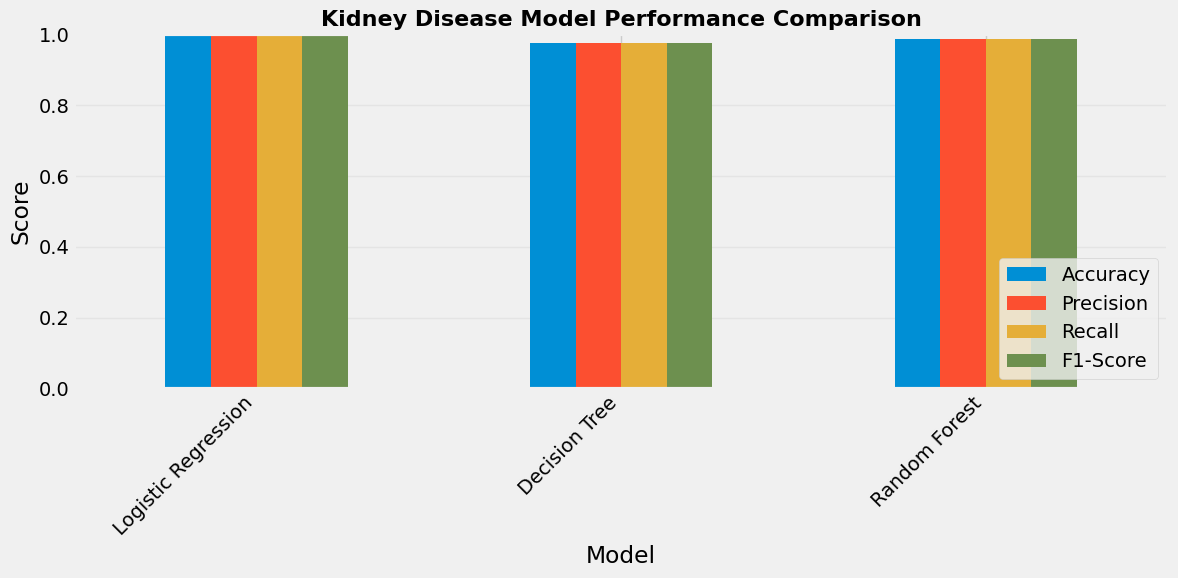

In [ ]:
# STEP 16: MODEL COMPARISON DASHBOARD
# ====================================================================

print("\n" + "="*60)
print("📊 MODEL COMPARISON DASHBOARD")
print("="*60)

# Create comparison DataFrame
models_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, log_preds),
        accuracy_score(y_test, tree_preds),
        accuracy_score(y_test, rf_preds)
    ],
    'Precision': [
        precision_score(y_test, log_preds, average='weighted'),
        precision_score(y_test, tree_preds, average='weighted'),
        precision_score(y_test, rf_preds, average='weighted')
    ],
    'Recall': [
        recall_score(y_test, log_preds, average='weighted'),
        recall_score(y_test, tree_preds, average='weighted'),
        recall_score(y_test, rf_preds, average='weighted')
    ],
    'F1-Score': [
        f1_score(y_test, log_preds, average='weighted'),
        f1_score(y_test, tree_preds, average='weighted'),
        f1_score(y_test, rf_preds, average='weighted')
    ]
})

print("\n" + models_comparison.to_string(index=False))

# Visualization
models_comparison.set_index('Model').plot(kind='bar', figsize=(12, 6))
plt.title('Kidney Disease Model Performance Comparison', fontsize=16, fontweight='bold')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.ylim(0, 1.0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: model_comparison.png")
plt.show()

In [ ]:
X_train.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium',
       ...
       'diabetes_mellitus_unknown', 'diabetes_mellitus_yes',
       'coronary_artery_disease_unknown', 'coronary_artery_disease_yes',
       'appetite_poor', 'appetite_unknown', 'peda_edema_unknown',
       'peda_edema_yes', 'aanemia_unknown', 'aanemia_yes'],
      dtype='object', length=216)

In [ ]:
"""
FIXED PREDICTION TOOL
Automatically handles all 216 features by filling missing ones with defaults
"""

# ====================================================================
# IMPROVED PREDICTION FUNCTION
# ====================================================================

def predict_kidney_disease(age, blood_pressure, specific_gravity, blood_glucose,
                           blood_urea, serum_creatinine, haemoglobin):
    """
    Predict if a patient has chronic kidney disease.

    User only provides 7 key measurements, function fills the rest automatically!

    Parameters:
    -----------
    age : float - Patient's age
    blood_pressure : float - Blood pressure
    specific_gravity : float - Specific gravity (e.g., 1.020)
    blood_glucose : float - Blood glucose random
    blood_urea : float - Blood urea
    serum_creatinine : float - Serum creatinine
    haemoglobin : float - Haemoglobin level

    Returns:
    --------
    prediction : str - 'ckd' or 'not ckd'
    confidence : float - Confidence percentage
    """

    # Create a DataFrame with ONE ROW and ALL required columns
    # Start with zeros for all columns
    sample_input = pd.DataFrame(0, index=[0], columns=X_train.columns)

    # Fill in the values the user provided
    sample_input['age'] = age
    sample_input['blood_pressure'] = blood_pressure
    sample_input['specific_gravity'] = specific_gravity
    sample_input['blood_glucose_random'] = blood_glucose
    sample_input['blood_urea'] = blood_urea
    sample_input['serum_creatinine'] = serum_creatinine
    sample_input['haemoglobin'] = haemoglobin

    # For continuous features we didn't ask for, use median from training data
    continuous_features = ['albumin', 'sugar', 'sodium', 'potassium',
                          'packed_cell_volume', 'white_blood_cell_count',
                          'red_blood_cell_count']

    for feat in continuous_features:
        if feat in X_train.columns:
            sample_input[feat] = X_train[feat].median()

    # Binary features (one-hot encoded) are already 0, which means:
    # - red_blood_cells_normal = 0 → assume normal
    # - hypertension_yes = 0 → assume no hypertension
    # - diabetes_mellitus_yes = 0 → assume no diabetes
    # etc. This is a reasonable default for "unknown" status

    # NOW scale the continuous features (same ones we scaled during training)
    # Identify which features need scaling
    features_to_scale = []
    for col in X_train.columns:
        unique_vals = X_train[col].dropna().unique()
        if not (len(unique_vals) <= 2 and set(unique_vals).issubset({0, 1, 0.0, 1.0})):
            features_to_scale.append(col)

    # Scale only continuous features
    sample_input[features_to_scale] = scaler.transform(sample_input[features_to_scale])

    # Make prediction using Random Forest (best model)
    prediction = rf_model.predict(sample_input)
    prediction_proba = rf_model.predict_proba(sample_input)

    # Decode the prediction
    predicted_class = le.inverse_transform(prediction)[0]
    confidence = max(prediction_proba[0]) * 100

    print(f"\n{'='*50}")
    print(f"🏥 KIDNEY DISEASE PREDICTION")
    print(f"{'='*50}")
    print(f"Input Values:")
    print(f"  Age: {age}")
    print(f"  Blood Pressure: {blood_pressure}")
    print(f"  Specific Gravity: {specific_gravity}")
    print(f"  Blood Glucose: {blood_glucose}")
    print(f"  Blood Urea: {blood_urea}")
    print(f"  Serum Creatinine: {serum_creatinine}")
    print(f"  Haemoglobin: {haemoglobin}")
    print(f"\n📊 RESULT:")
    print(f"  Predicted: {predicted_class.upper()}")
    print(f"  Confidence: {confidence:.2f}%")
    print(f"{'='*50}")

    return predicted_class


In [ ]:

# ====================================================================
# TEST THE FUNCTION
# ====================================================================

print("\n" + "="*60)
print("🎯 INTERACTIVE PREDICTION TOOL")
print("="*60)

print("\n🔬 Testing with example patients:\n")

print("👤 Patient 1 (Likely Healthy):")
predict_kidney_disease(
    age=35,
    blood_pressure=80,
    specific_gravity=1.020,
    blood_glucose=120,
    blood_urea=30,
    serum_creatinine=1.0,
    haemoglobin=14.5
)

print("\n👤 Patient 2 (Likely has CKD):")
predict_kidney_disease(
    age=60,
    blood_pressure=100,
    specific_gravity=1.005,
    blood_glucose=200,
    blood_urea=80,
    serum_creatinine=5.0,
    haemoglobin=8.0
)

print("\n👤 Patient 3 (Your own test):")
predict_kidney_disease(
    age=45,
    blood_pressure=90,
    specific_gravity=1.015,
    blood_glucose=140,
    blood_urea=50,
    serum_creatinine=2.5,
    haemoglobin=11.0
)


🎯 INTERACTIVE PREDICTION TOOL

🔬 Testing with example patients:

👤 Patient 1 (Likely Healthy):

🏥 KIDNEY DISEASE PREDICTION
Input Values:
  Age: 35
  Blood Pressure: 80
  Specific Gravity: 1.02
  Blood Glucose: 120
  Blood Urea: 30
  Serum Creatinine: 1.0
  Haemoglobin: 14.5

📊 RESULT:
  Predicted: NOT CKD
  Confidence: 64.58%

👤 Patient 2 (Likely has CKD):

🏥 KIDNEY DISEASE PREDICTION
Input Values:
  Age: 60
  Blood Pressure: 100
  Specific Gravity: 1.005
  Blood Glucose: 200
  Blood Urea: 80
  Serum Creatinine: 5.0
  Haemoglobin: 8.0

📊 RESULT:
  Predicted: CKD
  Confidence: 95.86%

👤 Patient 3 (Your own test):

🏥 KIDNEY DISEASE PREDICTION
Input Values:
  Age: 45
  Blood Pressure: 90
  Specific Gravity: 1.015
  Blood Glucose: 140
  Blood Urea: 50
  Serum Creatinine: 4
  Haemoglobin: 11.0

📊 RESULT:
  Predicted: CKD
  Confidence: 90.62%


'ckd'